# Importing needed libraries

In [158]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Loading our data

### I searched kaggle to find best csv files of UCI Adult dataset

In [159]:
train_df = pd.read_csv('/kaggle/input/uci-adult-census-data-dataset/adult_train.csv')
test_df = pd.read_csv('/kaggle/input/uci-adult-census-data-dataset/adult_test.csv')


# EDA

## to be more famaliar with the data we explore it

In [160]:
train_df.columns


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [161]:
train_df.shape


(32561, 15)

In [162]:
test_df.shape


(16282, 15)

In [163]:
train_df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [164]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [165]:
train_df.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education_Num        0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_week       0
Country            583
Target               0
dtype: int64

In [166]:
test_df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


### Check if there is any null values in our dataset

In [167]:
test_df.isna().sum()

Age                 0
Workclass         964
fnlwgt              1
Education           1
Education_Num       1
Martial_Status      1
Occupation        967
Relationship        1
Race                1
Sex                 1
Capital_Gain        1
Capital_Loss        1
Hours_per_week      1
Country           275
Target              1
dtype: int64

In [168]:
test_df = test_df[1:]

In [169]:
# to check how many uniaque values each feature has
test_df.nunique()

Age                  73
Workclass             8
fnlwgt            12787
Education            16
Education_Num        16
Martial_Status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_Gain        113
Capital_Loss         82
Hours_per_week       89
Country              40
Target                2
dtype: int64

In [170]:
def plot_num_feature_dist(train_df,feature):
        sns.histplot(data=train_df, x=feature, kde=True)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f" {feature}'s distribution ")
        plt.show()


In [171]:
def plot_cat_feature_dist(train_df,feature,rotation=45):
        sns.countplot(data=train_df, x=feature)
        plt.xticks(rotation=rotation) 
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f" {feature}'s distribution ")
        plt.show()

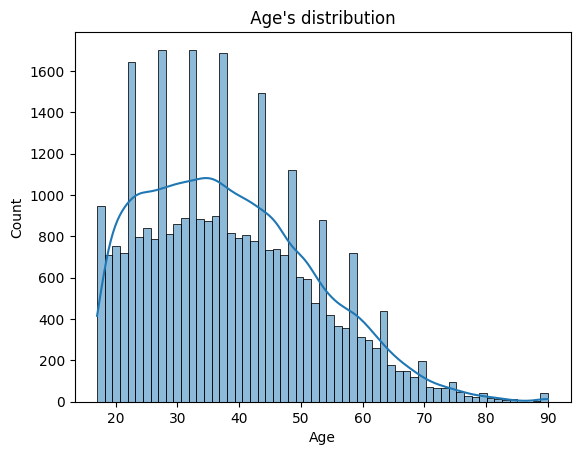

In [172]:
plot_num_feature_dist(train_df, 'Age')

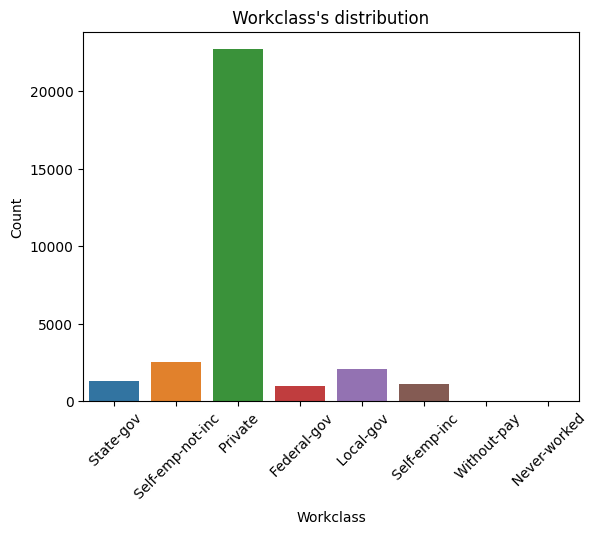

In [173]:
plot_cat_feature_dist(train_df, 'Workclass')


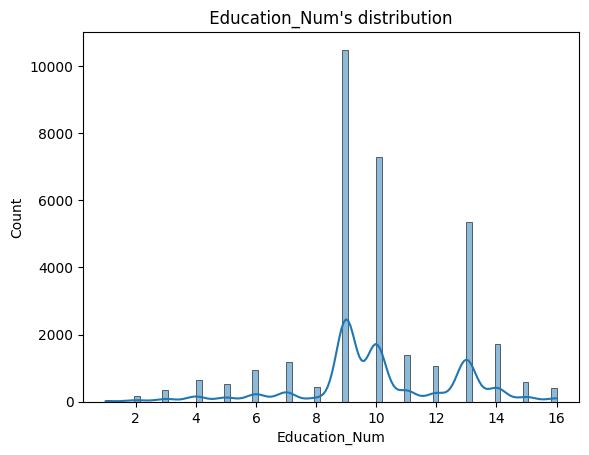

In [174]:
plot_num_feature_dist(train_df, 'Education_Num')


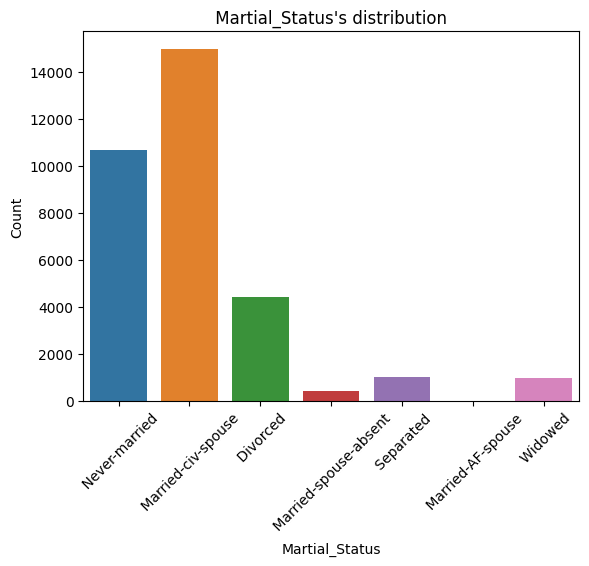

In [175]:
plot_cat_feature_dist(train_df, 'Martial_Status')


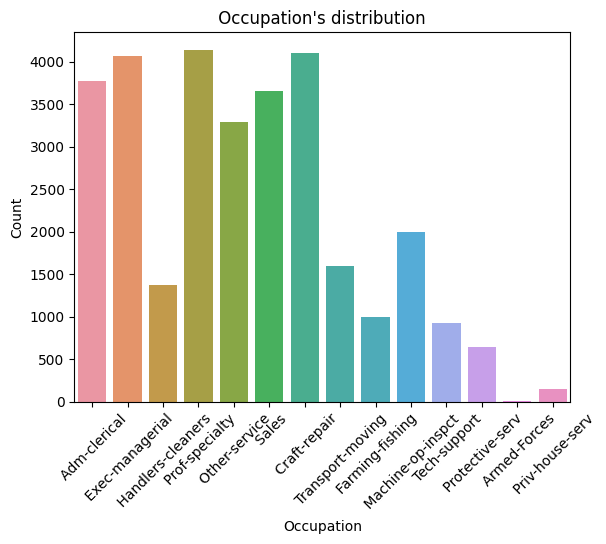

In [176]:
plot_cat_feature_dist(train_df, 'Occupation')


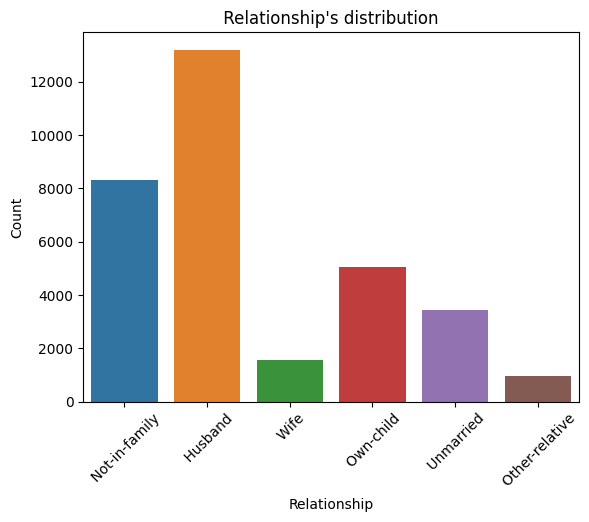

In [177]:
plot_cat_feature_dist(train_df, 'Relationship')


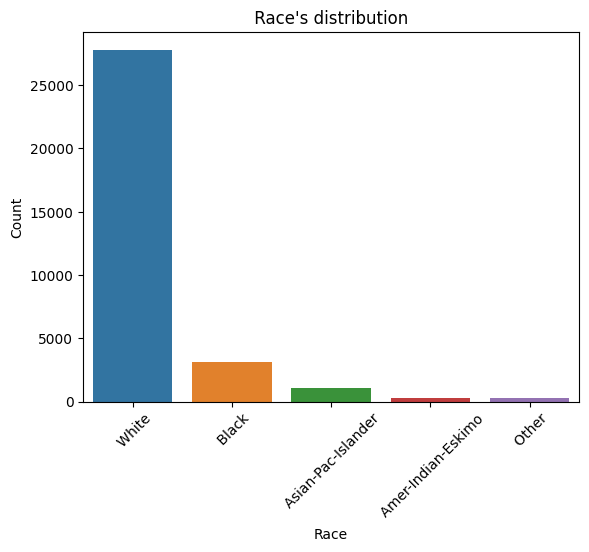

In [178]:
plot_cat_feature_dist(train_df, 'Race')


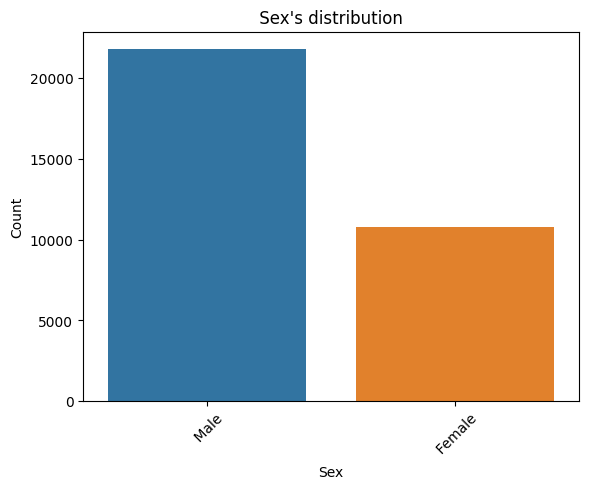

In [179]:
plot_cat_feature_dist(train_df, 'Sex')


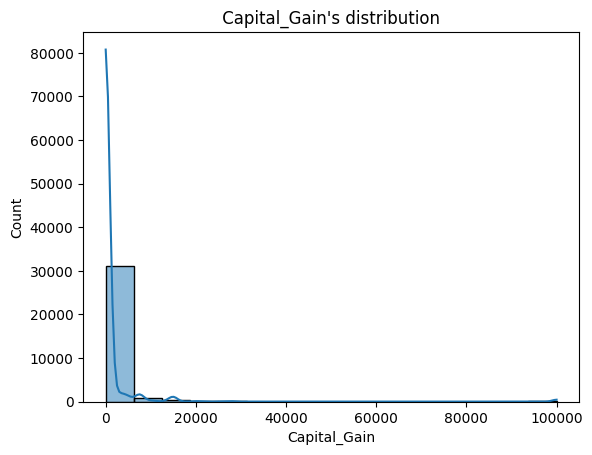

In [180]:
plot_num_feature_dist(train_df, 'Capital_Gain')


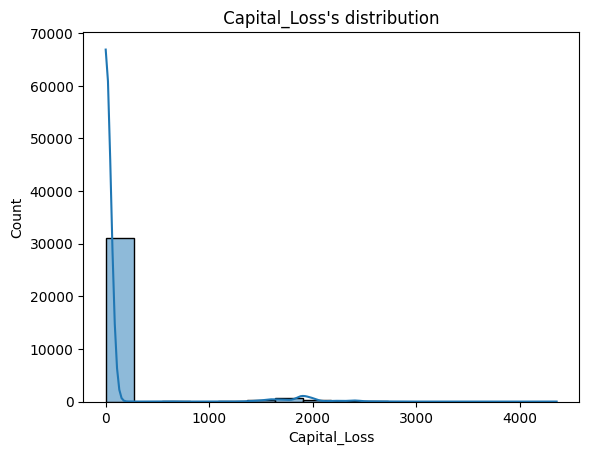

In [181]:
plot_num_feature_dist(train_df, 'Capital_Loss')


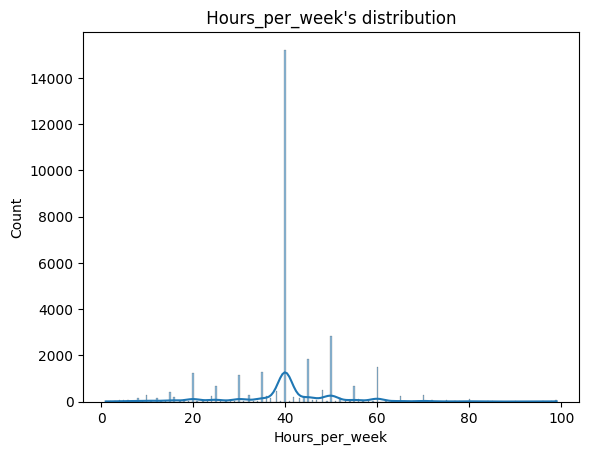

In [182]:
plot_num_feature_dist(train_df, 'Hours_per_week')


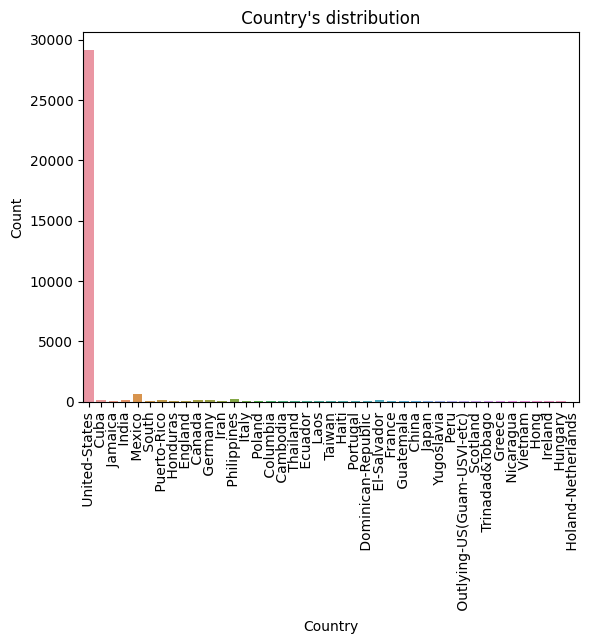

In [183]:
plot_cat_feature_dist(train_df, 'Country', 90)


# Handling missing values

In [184]:
numeric_features = ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']
categorical_features = ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']

In [185]:
# mean strategy for numerical columns
numeric_imputer = SimpleImputer(strategy='mean')
# most_frequent strategy for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

train_df[numeric_features] = numeric_imputer.fit_transform(train_df[numeric_features])
train_df[categorical_features] = categorical_imputer.fit_transform(train_df[categorical_features])

In [186]:
train_df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [187]:
train_df.isna().sum()


Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

In [188]:
len(train_df)

32561

In [189]:
test_df[numeric_features] = numeric_imputer.fit_transform(test_df[numeric_features])
test_df[categorical_features] = categorical_imputer.fit_transform(test_df[categorical_features])

In [190]:
test_df[0:30]

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18.0,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
6,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
7,29.0,Private,227026.0,HS-grad,9.0,Never-married,Prof-specialty,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K.
8,63.0,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K.
9,24.0,Private,369667.0,Some-college,10.0,Never-married,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.
10,55.0,Private,104996.0,7th-8th,4.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,10.0,United-States,<=50K.


In [191]:
salary_map={' <=50K':1,' >50K':0}
train_df['Salary']=train_df['Target'].map(salary_map).astype(int)

In [192]:
salary_map={' <=50K.':1,' >50K.':0}
test_df['Salary']=test_df['Target'].map(salary_map).astype(int)

In [193]:
train_df.drop(columns=['Target'], inplace=True)
test_df.drop(columns=['Target'], inplace=True)

In [194]:
train_df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,1
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,1
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,1
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,1
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,1


In [195]:
test_df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Salary
1,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,1
2,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,1
3,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,0
4,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,0
5,18.0,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,1


In [196]:
test_df.isna().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [197]:
train_df.isna().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education_Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [198]:
numeric_train_set = train_df[numeric_features]
categorical_train_set = train_df[categorical_features]

In [199]:
len(numeric_train_set)

32561

In [200]:
len(categorical_train_set)

32561

In [201]:
numeric_test_set = test_df[numeric_features]
categorical_test_set = test_df[categorical_features]

In [202]:
len(numeric_test_set)

16281

In [203]:
len(categorical_test_set)

16281

# one-hot train and test

In [204]:
categorical_train_set = pd.get_dummies(categorical_train_set, 
                                      columns=categorical_train_set.select_dtypes(include=['object']).columns, dtype=int)
categorical_train_set = categorical_train_set.astype(int)

In [205]:
categorical_train_set.head()

,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 10th,Education_ 11th,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
len(categorical_train_set)

32561

In [207]:
categorical_test_set = pd.get_dummies(categorical_test_set, 
                                      columns=categorical_test_set.select_dtypes(include=['object']).columns, dtype=int)
categorical_test_set = categorical_test_set.astype(int)


In [208]:
categorical_test_set.head()

,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 10th,Education_ 11th,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [209]:
len(categorical_test_set)

16281

# Normalizing training data

In [210]:
scaler = StandardScaler()


In [211]:
numeric_train_set = pd.DataFrame(scaler.fit_transform(numeric_train_set), columns=numeric_train_set.columns)


In [212]:
len(numeric_train_set)

32561

In [213]:
numeric_train_set.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


# Concating to make train and test dataset

In [214]:
train_data = pd.concat([numeric_train_set, categorical_train_set,train_df['Salary']], axis=1)

In [215]:
len(train_data)

32561

In [216]:
train_data[160:1900]

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Salary
160,2.156735,-1.434995,-3.140957,-0.14592,-0.21666,-1.655225,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
161,-0.995706,0.596633,-0.420060,-0.14592,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
162,0.397233,-1.055482,1.523438,-0.14592,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
163,-0.775768,-0.960312,-0.420060,-0.14592,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
164,0.470546,0.107075,1.523438,-0.14592,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0.250608,2.421673,1.134739,-0.14592,-0.21666,0.369519,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1896,0.470546,-0.734217,1.134739,-0.14592,-0.21666,1.179417,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1897,-0.922393,-0.308194,-1.197459,-0.14592,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1898,-0.995706,-0.757059,-0.420060,-0.14592,-0.21666,0.369519,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [217]:
train_data.isna().sum()

Age                         0
fnlwgt                      0
Education_Num               0
Capital_Gain                0
Capital_Loss                0
                           ..
Country_ Trinadad&Tobago    0
Country_ United-States      0
Country_ Vietnam            0
Country_ Yugoslavia         0
Salary                      0
Length: 106, dtype: int64

In [218]:
train_data.isna().sum()

Age                         0
fnlwgt                      0
Education_Num               0
Capital_Gain                0
Capital_Loss                0
                           ..
Country_ Trinadad&Tobago    0
Country_ United-States      0
Country_ Vietnam            0
Country_ Yugoslavia         0
Salary                      0
Length: 106, dtype: int64

In [219]:
len(train_data)

32561

In [220]:
X_train = train_data.drop(columns=['Salary'])


In [221]:
len(X_train)

32561

In [222]:
y_train = train_data['Salary']

In [223]:
len(y_train)

32561

## Concating test data

In [224]:
test_data = pd.concat([numeric_test_set, categorical_test_set,test_df['Salary']], axis=1)

In [225]:
len(test_data)

16281

In [226]:
test_data.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Salary
1,25.0,226802.0,7.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,38.0,89814.0,9.0,0.0,0.0,50.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,28.0,336951.0,12.0,0.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,44.0,160323.0,10.0,7688.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,18.0,103497.0,10.0,0.0,0.0,30.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [227]:
test_data.isna().sum()

Age                         0
fnlwgt                      0
Education_Num               0
Capital_Gain                0
Capital_Loss                0
                           ..
Country_ Trinadad&Tobago    0
Country_ United-States      0
Country_ Vietnam            0
Country_ Yugoslavia         0
Salary                      0
Length: 105, dtype: int64

In [228]:
X_test = test_data.drop(columns=['Salary'])

In [229]:
len(X_test)

16281

In [230]:
y_test = test_data['Salary']

In [231]:
len(y_test)

16281

# drop mistaken column

In [232]:
X_train = X_train.drop(columns=['Country_ Holand-Netherlands'])


In [233]:
X_test['Age'] = pd.to_numeric(X_test['Age'], errors='coerce').astype('float')

# Machine Learning Model

## Random Forest 

In [234]:
rf = RandomForestClassifier()
RF_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 6, 8, 10, 12]}
grid = GridSearchCV(rf, RF_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = grid.fit(X_train, y_train)
accuracy = grid_search.best_score_ *100
print("Accuracy:", accuracy)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuracy: 85.95255805111499
